

<h2 align="center">Simple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

### Loading the Data and Importing Libraries
---

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [41]:
data = pd.read_csv('Advertising.csv')

In [42]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [44]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

### Remove the index column

In [45]:
data = data.drop(['Unnamed: 0'],axis =1)

In [46]:
data.shape

(200, 4)

In [47]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Exploratory Data Analysis

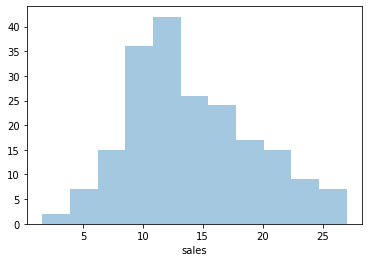

In [48]:
sns.distplot(data.sales,kde=False)

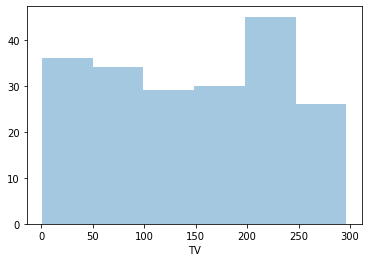

In [50]:
sns.distplot(data.TV,kde=False)

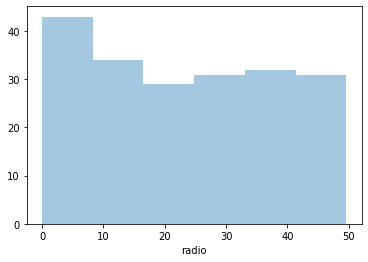

In [51]:
sns.distplot(data.radio,kde=False)

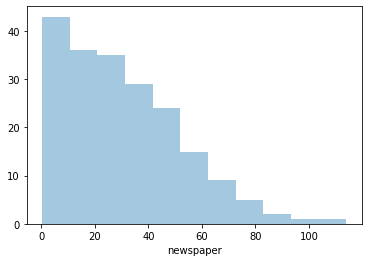

In [49]:
sns.distplot(data.newspaper,kde=False)

### Exploring Relationships between Predictors and Response

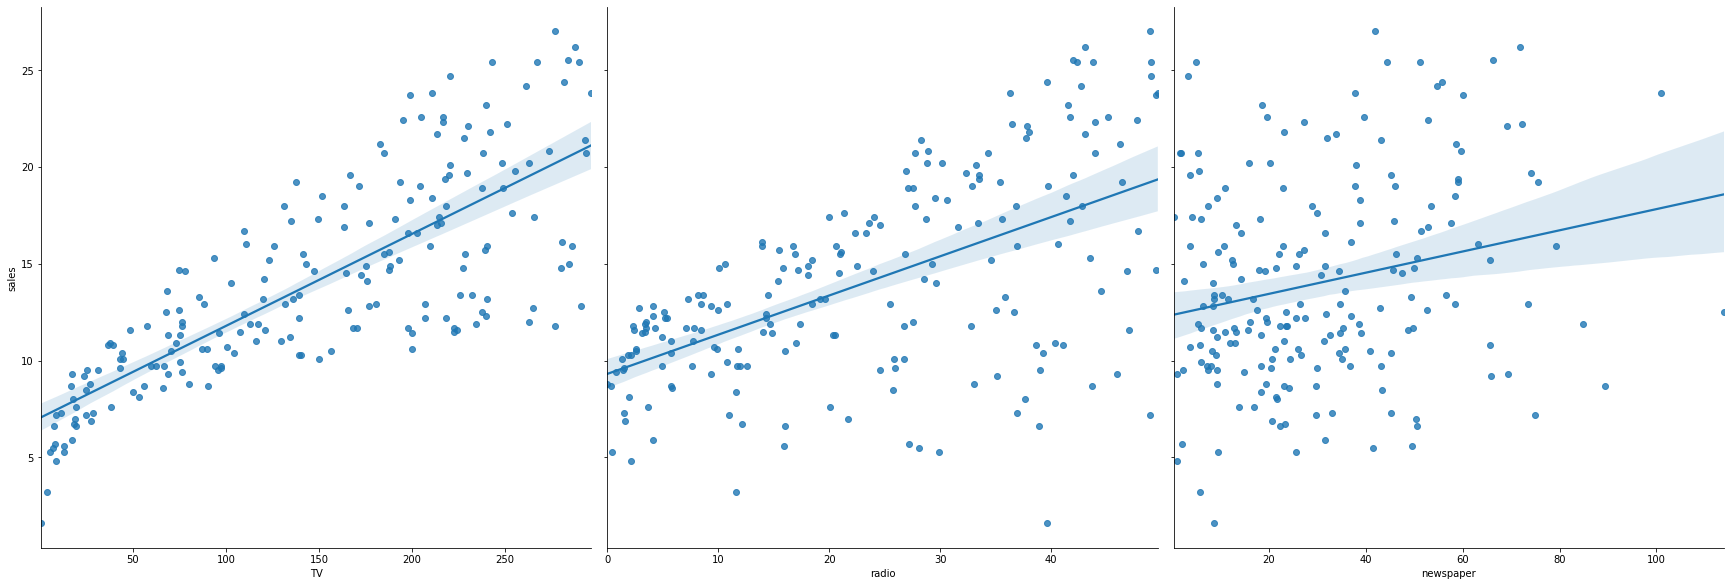

In [53]:
sns.pairplot(data=data,x_vars=['TV','radio','newspaper'],y_vars='sales',height = 8,aspect=1,kind='reg')

In [56]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [58]:
np.round(data.corr(),2)

,TV,radio,newspaper,sales
TV,1.00,0.05,0.06,0.78
radio,0.05,1.00,0.35,0.58
newspaper,0.06,0.35,1.00,0.23
sales,0.78,0.58,0.23,1.00


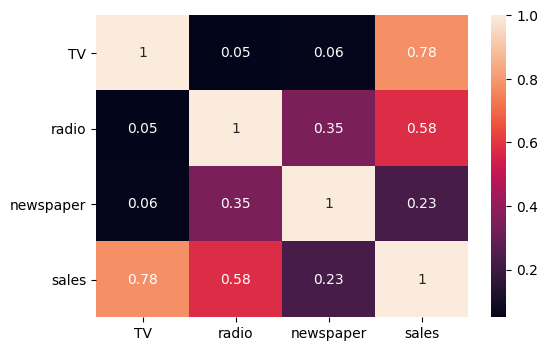

In [61]:
plt.figure(dpi=100)
sns.heatmap(np.round(data.corr(),2),annot =True)

### Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [67]:
X= data[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [65]:
y = data[['sales']]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=1)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [72]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Interpreting Model Coefficients

In [73]:
print(linreg.intercept_)
print(linreg.coef_)

[6.91197262]
[[0.04802945]]


### Making Predictions with our Model

In [75]:
y_pred = linreg.predict(X_test)
y_pred[:5]

array([[17.03658069],
       [16.63793625],
       [11.50839099],
       [20.36982452],
       [19.10184704]])

### Model Evaluation Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [79]:
print('Training Score')
print(linreg.score(X_train,y_train))

Training Score
0.623827651655809


In [87]:
print('Test Score')
print(linreg.score(X_test,y_test))

Test Score
0.5590828580007852


In [84]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squ_error = mean_squared_error(y_test, y_pred)
mean_abs_error = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squared Error: 10.310069587813155
Mean absolute Error: 2.4643080986027908
